## Logistic Regression
<img src="sigmoid.png" width=450 height=450 />

The Sigmoid function takes in any value i.e you give any value to Z the outputs it to be between 0 and 1  
The cutoff point is 0.5 naything below it results in class 0 anything above is class 1

<img src="lr.png" width=500 height=500 />

Putting linear regression solution and place it into the Sigmoid Function


### Model Evaluation

Test for presence of Disease

Total observations : 165

TP = predicted they have disease and Actually they have disease  
TN = predicted they dont have disease and Actually they dont have disease  
FP = predicted they have disease but in reallity they dont have disease (Type-1 error)   
eg: you are predicting a male to be pregnent but he is not.   
FN = predicted they dont have disease but in reallity they have disease (Type-2 error)  
eg: you are predicting a female to be not pregnent but she is pregnent


<img src="ConfusionMat.png" width=600 height=600 />

<b>Accuracy</b> : (TP+TN)/Total = 150/165 = 0.91  
<b>Error Rate</b> : (FP+FN)/Total = 15/165 = 0.09/ 9%



### Titanic Dataset:  
we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

## Import Libraries
Let's import some libraries to get started!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset = pd.read_csv('titanic_train.csv')

In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

#### Displaying coloumns with missing values

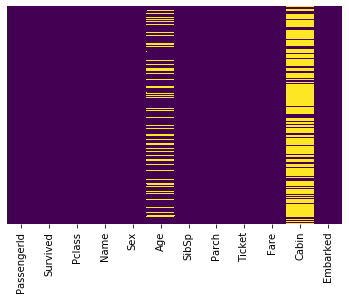

In [5]:
sns.heatmap(dataset.isnull(), yticklabels= False, cbar = False, cmap='viridis') #age and cabin has missing values

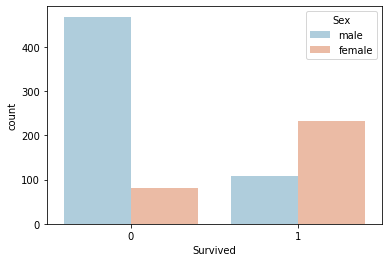

In [6]:
sns.countplot(x='Survived', hue = 'Sex', data= dataset, palette = 'RdBu_r') # Male didnt survive whereas 
                                                                            # Female does survive

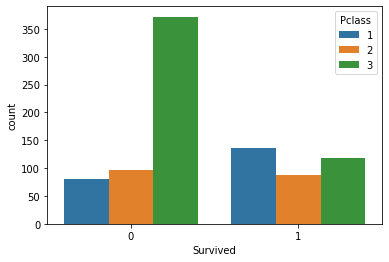

In [7]:
sns.countplot(x='Survived', hue = 'Pclass', data= dataset) #passengers in class-3 have died more

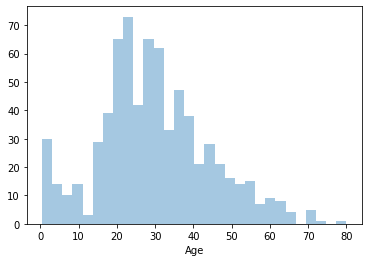

In [8]:
#Now if we want to check which age people are more in the ship

sns.distplot(dataset['Age'].dropna(),kde=False,bins=30) # group of passengers are from more between 20-30 , 
                                                        # younger passenger

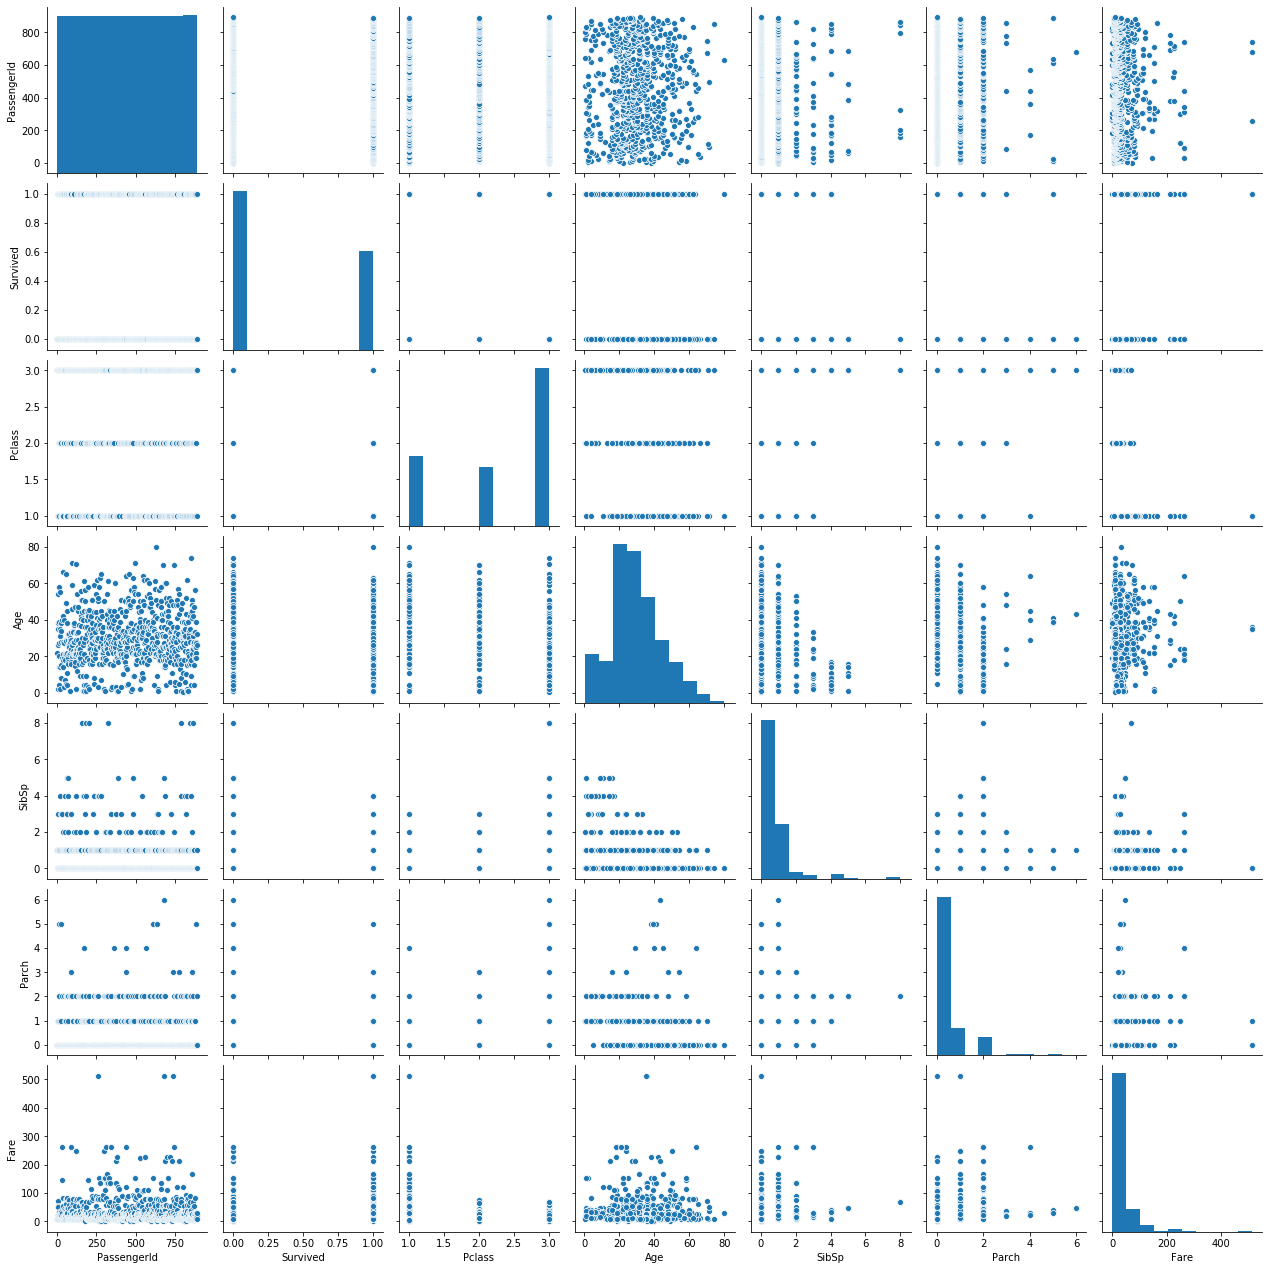

In [11]:
sns.pairplot(dataset,palette='bwr')

#### if you want to make little bit interactive visualization = Cufflinks

In [8]:
import cufflinks as cf

In [9]:
#pip install cufflinks

In [10]:
cf.go_offline()

In [11]:
dataset['Age'].dropna().iplot(kind='hist',bins=50)

# Data Preprocessing

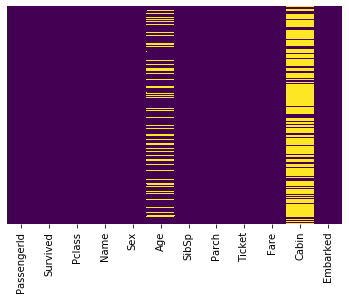

In [12]:
sns.heatmap(dataset.isnull(), yticklabels= False, cbar = False, cmap='viridis') #age and cabin has missing values

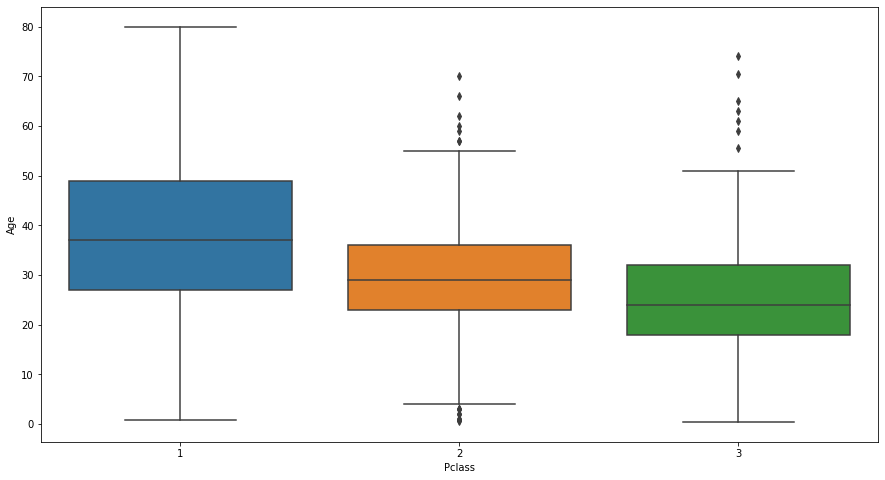

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Pclass', y='Age', data=dataset)

### Handling Missing values

Asumme the age of the passenger depending upon the class 

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

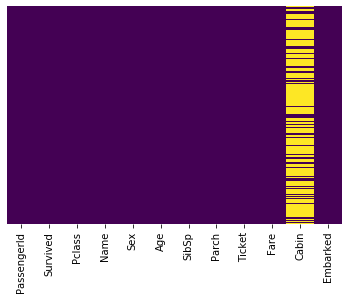

In [16]:
sns.heatmap(dataset.isnull(), yticklabels= False, cbar = False, cmap='viridis') # no missing values for Age

#### As there are too many missing values then its better to drop the coloumn

In [17]:
dataset.drop('Cabin', axis = 1, inplace = True)

In [18]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


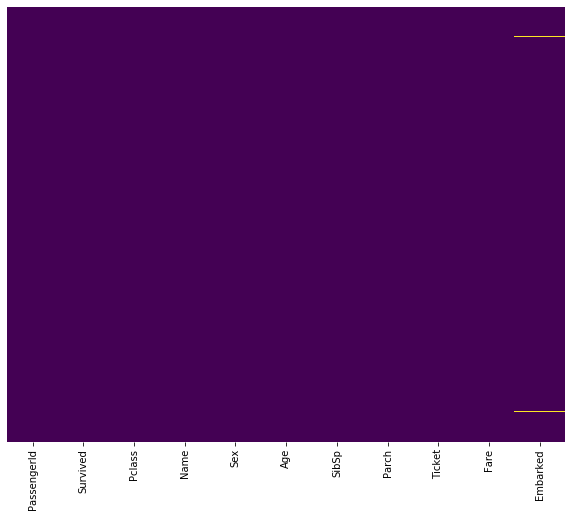

In [19]:
plt.figure(figsize=(10, 8))

sns.heatmap(dataset.isnull(), yticklabels= False, cbar = False, cmap='viridis') # no missing values for Age

In [20]:
dataset.dropna(inplace=True)

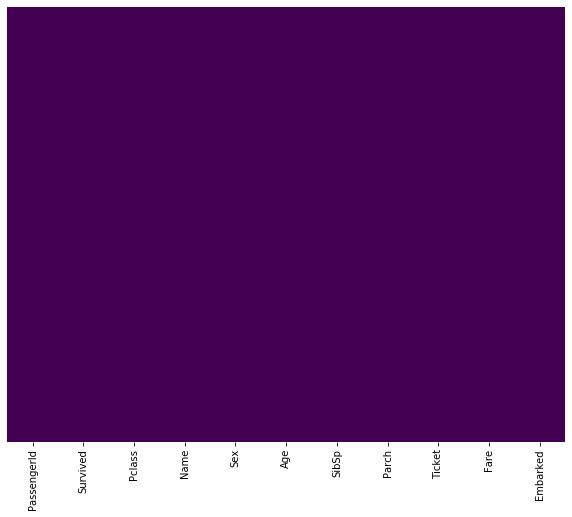

In [21]:
#No missing values

plt.figure(figsize=(10, 8)) 

sns.heatmap(dataset.isnull(), yticklabels= False, cbar = False, cmap='viridis') # no missing values for Age

### Handling Catagorical Variable (Dummy Variable)

In [22]:
pd.get_dummies(dataset['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


#### Multi-collinearity = one coloumn easily predict another coloumn. Like if female coloumn is 0 then male coloumn should be 1

In [23]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)

In [24]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [25]:
pd.get_dummies(dataset['Embarked']) # Multi-collinearity = C and S

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [26]:
embark = pd.get_dummies(dataset['Embarked'], drop_first=True)

In [27]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [28]:
dataset = pd.concat([dataset,sex,embark], axis = 1)

In [29]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [30]:
dataset.drop(['Sex','Embarked','Name', 'Ticket', 'PassengerId'], axis = 1, inplace=True)

In [31]:
dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


# Training and Predicting

In [34]:
dataset.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [35]:
x = dataset.drop('Survived', axis = 1)
y = dataset['Survived']

In [37]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

/Users/abhishekkumarsarkar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
predictions = logReg.predict(X_test)

In [45]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [46]:
y_test

511    0
613    0
615    1
337    1
718    0
      ..
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

# Evaluation

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [52]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])

In [55]:
accuracy_score(y_test,predictions)

0.8277153558052435